In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import json

In [4]:
# reading the csv
us_df = pd.read_csv("USvideos.csv", encoding="ISO-8859-1")
us_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots wonât mean the en...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [5]:
# reading the json file
file = open("us_category_id.json")
us_json = json.load(file)

In [6]:
# looping through the json file and replacing the category id with the category name
length = len(us_json["items"])
print(length)

us_df["category_id"] = us_df["category_id"].astype(str)

for x in range(length):
    id_number = us_json["items"][x]["id"]
    category_name = us_json["items"][x]["snippet"]["title"]
    us_df["category_id"] = us_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
us_df["category_id"] = us_df["category_id"].replace({"29": "Nonprofits & Activism"})
    
us_df.head()

32


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
# this shows how many videos of each category is present in the data
us_count_df = pd.DataFrame(us_df.groupby("category_id").count(), columns=["video_id"])
us_count_df = us_count_df.rename(columns={"video_id": "count"})
us_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Entertainment,9964
Music,6472
Howto & Style,4146
Comedy,3457
People & Blogs,3210
News & Politics,2487
Science & Technology,2401
Film & Animation,2345
Sports,2174


In [10]:
# separate dataframe using just the numerical value columns
# this is probably not too needed
us_dateview_df = pd.DataFrame(us_df, columns=["trending_date", "views", "likes", "dislikes", "comment_count"])

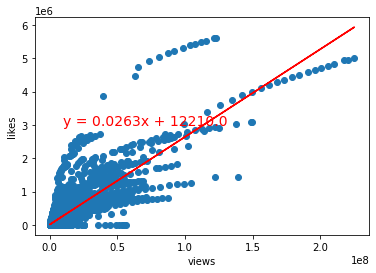

In [11]:
# views vs likes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(us_dateview_df["views"], us_dateview_df["likes"])
regress_value = us_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(us_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(us_dateview_df["views"], us_dateview_df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

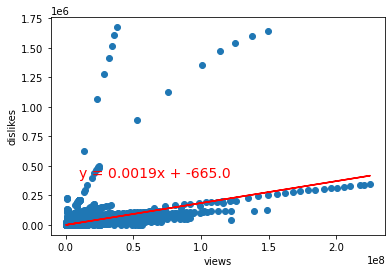

In [12]:
# views vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(us_dateview_df["views"], us_dateview_df["dislikes"])
regress_value = us_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(us_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 4e5), fontsize=14, color="red")
plt.scatter(us_dateview_df["views"], us_dateview_df["dislikes"])
plt.xlabel("views")
plt.ylabel("dislikes")
plt.show()

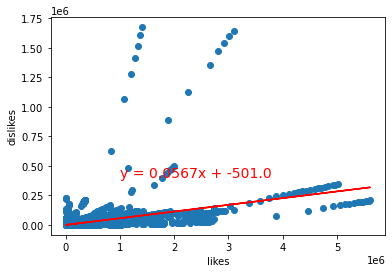

In [13]:
# likes vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(us_dateview_df["likes"], us_dateview_df["dislikes"])
regress_value = us_dateview_df["likes"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(us_dateview_df["likes"], regress_value, "r-")
plt.annotate(line_eq, (1e6, 4e5), fontsize=14, color="red")
plt.scatter(us_dateview_df["likes"], us_dateview_df["dislikes"])
plt.xlabel("likes")
plt.ylabel("dislikes")
plt.show()

In [15]:
# shows how many videos on which category has the comments/ratings disabled, and video removed
us_no_comment_df = us_df.loc[us_df["comments_disabled"] == True, :]
us_no_rate_df = us_df.loc[us_df["ratings_disabled"] == True, :]
us_no_video_df = us_df.loc[us_df["video_error_or_removed"] == True, :]

#kr_no_comment_df["category_id"].value_counts()
#kr_no_rate_df["category_id"].value_counts()
us_no_video_df["category_id"].value_counts()

Film & Animation    13
Entertainment        8
Sports               2
Name: category_id, dtype: int64

In [16]:
us_no_video_df.describe()

,views,likes,dislikes,comment_count
count,2.300000e+01,23.000000,23.000000,23.000000
mean,1.657090e+06,48770.434783,1442.608696,2565.391304
std,2.606735e+06,83662.672884,1654.917431,3697.124875
min,2.611000e+03,8.000000,12.000000,0.000000
25%,3.248885e+05,5369.000000,204.500000,844.000000
50%,8.330270e+05,30695.000000,1353.000000,2151.000000
75%,1.219431e+06,47865.500000,1902.500000,2721.500000
max,1.197980e+07,408461.000000,6516.000000,17964.000000


In [17]:
# shows which channel
us_df["channel_title"].value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
TheEllenShow                              193
Netflix                                   193
                                         ... 
EVNautilus                                  1
BrianJustinCrum                             1
BTS Videos                                  1
I'm With Her                                1
edlover4real                                1
Name: channel_title, Length: 2207, dtype: int64